# Lesson 3: Data Analysis Workflow and Indexing

Once you acquire data, you should follow a workflow that processes all your data in an automated way. Below is a general outline of how this normally should happen, but this is not strictly true for all data. We will go through all of these steps today. 

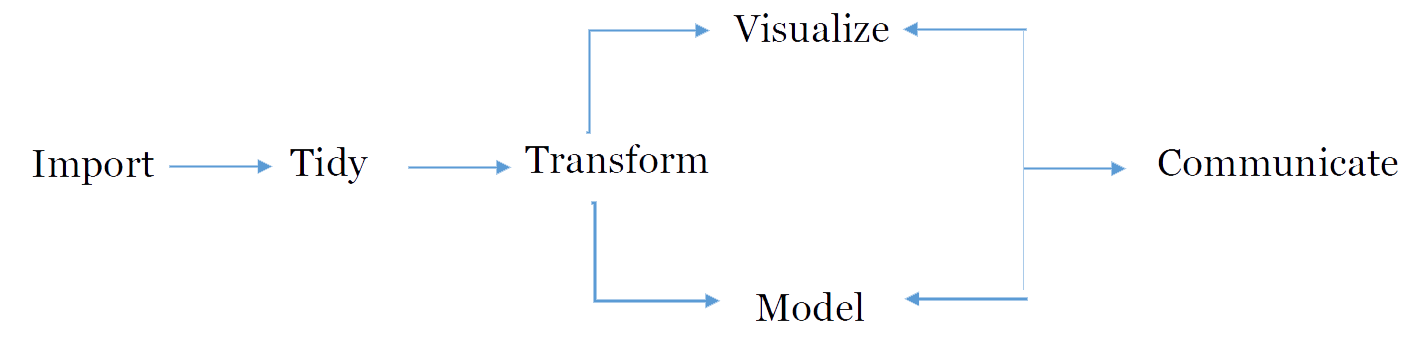

An important aspect of this workflow is indexing your data. By indexing, I mean selecting elements of a multi-dimensional dataset. For example, a calcium imaging dataset is often arranged as a neuron x time array. You will commonly want to select certain neurons and/or examine certain time windows. To do this, you must index. Recall the following toy array:

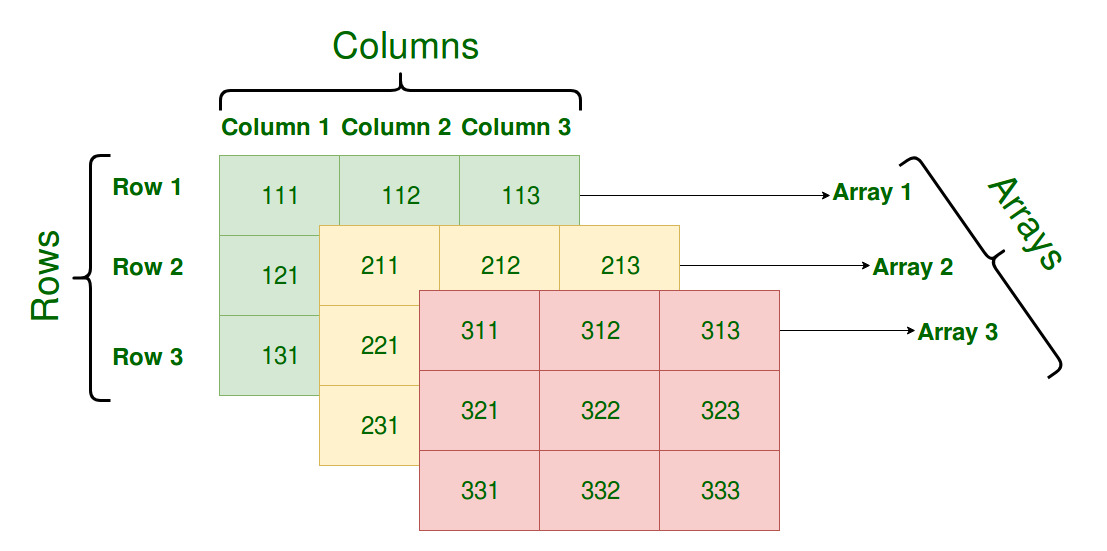

In the image above, the red array is a 2D array that is 3x3 (3 rows and 3 columns). If we consider the entire image, the collective array actually has three dimensions (three 3x3 arrays). See lesson 2 for a reminder of possible applications of this data structure. 

Let's recreate this array. 

In [ ]:
import numpy as np
red_array = np.asarray([[311, 312, 313], [321, 322, 323], [331, 332, 333]]) # Recreate the red array above. 

whole_array = np.asarray([[[111, 112, 113], [121, 122, 123], [131, 132, 133]], 
                          [[211, 212, 213], [221, 222, 223], [231, 232, 233]],
                          red_array])                                       # Recreate the whole array.

To index an array, enter the name of the variable you are trying to index followed by values inside brackets. Values inside the brackets are separated by commas, with each value corresponding to a different dimension. In a 2D array, the first value is the row and the second value is the column. In Python, indexing is 0-based, meaning the first element of an array is actually the zero-th element, so to access it, you need to use 0 rather than 1. Let's see this in action.

In [ ]:
# The first row, second column of the red array. 
red_array[0,1]

In [ ]:
# Try finding the value 323 in red_array here. 


To select everything in a dimension, use `:`

In [ ]:
# Every row, second column. 
red_array[:,1]

In [ ]:
# Try selecting each COLUMN on the third ROW here. 


In [ ]:
# Try selecting the first and third rows of second column here. Hint: You will need a list of indices. 


Another useful index value is `-1`, which indicates the last position of that dimension.

In [ ]:
# The last value of the first column in the red_array. 
red_array[-1,0]

In 3D arrays, the first dimension is the "sheet number", while rows and columns shift down one dimension. So in 3D arrays, the notation is `whole_array[sheet, row, column]`. You can make arrays larger than 3D, at which point it stops being useful to visualize them, so you would just think about it as `big_array[dimension1, dimension2, dimension3, dimension4, ...]`.

In [ ]:
# Try finding the value 321 in whole_array here.


In [ ]:
# Try selecting the second column of the yellow array here. 


You get the idea. There are many more variations on how to index that you can try on your own: https://docs.scipy.org/doc/numpy-1.10.0/user/basics.indexing.html. Let's move on to loading data.

# Importing / loading your data

The first step in your data analysis workflow is loading your data. I will use the word "load" here so there is no confusion about importing versus loading. `import` in Python refers exclusively to putting the contents of a Python package into your workspace. If you try to `import` your data, it will not work. Instead, we `import` a package that will allow us to load our data. 

The data will be working with is behavioral data from Christine. Below, we import a package called `pandas` and use it to load an Excel spreadsheet. `pandas` is a useful package for managing, manipulating, and even plotting your data.

In [ ]:
import pandas as pd

filename = r'../Data/EtOH WD Study Combined Raw Data_WM.xlsx'
df = pd.read_excel(filename)

df #Displays a truncated DataFrame. 

A DataFrame is basically an array in the sense that it has columns and rows. However, while arrays don't typically have labels associated with its columns and rows, a DataFrame does. Also DataFrames can be filled with mixed data types (i.e., strings and numbers can coexist in the same DataFrame, but this is not commonly done in arrays). Indexing works in a similar way for DataFrames and arrays.

The first four columns are metadata about each animal, what experiment they belonged to, and treatments or opsin expression. The following columns are freezing percentages for each condition or time window. `NaN` means Not a Number, which is commonly used as a placeholder for missing data or not applicable. 

Let's look at all the labels of our DataFrame.

In [ ]:
# Lists the names of all the columns. 
df.columns

# Here, df is the DataFrame and .columns is what's called an "attribute" of this particular DataFrame. 
# Think of .columns as an adjective that describes a property of df. 

The first four columns are fairly intuitive. The rest are labels for different fear conditioning exposures. BL_A refers to baseline freezing in context A, Tr1_A refers to the first training session context A, E1 to the first extinction session, etc. There are also some unnamed columns that are empty. 

# Tidying your data

The next thing you want to do is clean up your data. As Gordon Ramsay says, if you work in a mess, you'll produce a mess. We will only be working on data from the "Normative" experiment, so let's get rid of everything else. Use a Boolean vector to only select the rows of the DataFrame where the experiment is "Normative". 

In [ ]:
# Recall that = sets a variable while == queries whether the statement is True. 
good_rows = df['Experiment'] == 'Normative'

# The result is a Boolean vector that is True for all rows where the Experiment is Normative, and False otherwise. 
# Take a minute to understand how you made this vector. 
good_rows

Now let's do the actual filtering. `.loc[]` allows you to select certain rows in your DataFrame. Recall that ```df.columns``` displayed all the labels of our DataFrame. `.loc[]` also operates on the DataFrame, but in a different way. While `.columns` could be thought of as an adjective (attribute) describing a property of `df`, `.loc[]` works more like a function (i.e., a verb). When a Python object has a function "built-in", that function is called a "method". Here, we are asking Python to select only the locations indicated by `good_rows` (i.e., where good_rows is True). 

In [ ]:
# Recall that you can specify indices in the brackets, with indices for each dimension separated by brackets. 
# So here, we take only the rows where good_rows = True, plus all the columns (indicated by the colon).
normative = df.loc[good_rows, :] 

normative 

Don't worry, nothing happens to the Excel spreadsheet when you do this. Nothing even happens to the original DataFrame. You are simply copy and pasting a chunk of `df` into a new variable `normative`.

# Transforming your data

Transforming can refer to many things. Usually with calcium traces, you would z-score within each neuron here. You might choose other types of transformation depending on what you want to do. For example, normalization. It all depends on what statistical comparison you're trying to run. 

In [ ]:
# Fill this line. From the normative DataFrame, take only the columns corresponding to BL_A, Tr1_A, Tr2_A, Tr3_A, and Tr4_A. 
# There are several ways you can do this. Using .loc[] is probably easiest. 
training_A = 

Let's take a peak at what we have so far. 

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.plot(training_A.T)
# .T transposes your array. This is to accommodate how plt.plot() plots data, since it normally plots a line for each column, 
# we rotate the array by 90 degrees. 

plt.xlabel('Fear conditioning progress')
plt.ylabel('Freezing %')

In [ ]:
# You can accomplish the same thing with pandas. The DataFrame has a plot() method that works almost identical to plt(). 
training_A.T.plot(legend=False) # legend=False just excludes the legend, which makes the plot cleaner.

These look okay but a little messy. I decide that I want bar plots with error bars for each epoch instead. 

But before we plot, we need to transform our data to fit the requirements of the plotting functions. Your instinct would be to just replace `.plot()` with the bar plot method `.plot.bar()`, which will work, but won't produce the desired result. 

In [ ]:
training_A.T.plot.bar(legend=False)

Above, you are plotting *each* animal. But for our bar plot, we want the *means* across animals. So we must first compute the means (i.e., transform our data) and also the standard error. Then we pass *that* information into the the plotting function. Let's compute the means and standard error below.

In [ ]:
means = training_A.mean(axis=0) # The axis argument specifies that we're taking the mean across rows. 
sem = training_A.sem(axis=0)

# Visualizing your data

Now we can finally visualize our end result. 

In [ ]:
means.plot.bar(yerr=sem) # yerr specifies how big the error bars are. 
plt.xlabel('Fear conditioning progress')
plt.ylabel('Mean freezing %')

In [ ]:
# You can do the same thing in matplotlib. 
plt.bar(x=training_A.columns, height=means, yerr=sem)
plt.xlabel('Fear conditioning progress')
plt.ylabel('Mean freezing %')

Dope, you have a figure. But we're not done. We still need to interpret the data (i.e., do some modeling or a statistical test). 

# Model your data

Modeling your data can vary widely depending on what you're trying to do. Here, let's just assess whether freezing post-shock (Tr4_A) is higher than baseline (BL_A). We can run a simple statistical test (Wilcoxon signed-rank test for comparing paired samples). 

In [ ]:
from scipy.stats import wilcoxon

# There's a bit of indexing here too. No hints.
baseline = 
post_shock = 

# Look up the syntax for wilcoxon() and run on the appropriate variables.
wilcoxon(____)

Cool, you have a p-value. And now you're ready to communicate your data in a Nature paper. 

# IDEs

If I designed this lesson well, we should have a little more time to explore an *integrated development environment* or an IDE. Few people actually develop code in Jupyter Notebooks. Most people use an IDE. 

An IDE is an application that provides a large variety of tools that make programming more convenient. Such tools include:

* Source code editor (where you develop code) 
* Syntax highlighting (to illustrate data types and also notify you where your syntax is wrong)
* Code autocompletion (to an extent lol) 
* Debugger (to explore the present conditions of a workspace where your code breaks so that you can fix it)
* Object browser (to inspect variables)

For scientific computing, PyCharm is a great IDE. Another popular one is Spyder. For the rest of the time today, we will do some light tinkering in PyCharm. And with that, we will leave Jupyter Notebooks behind. The next (and possibly last) exercise will all be done in PyCharm. 

# Challenges, misc.

Below are alternative ways to get the same result from the first cell in Transforming your Data.

In [ ]:
# Passing through a subset of the list of columns. 
training_A = normative.loc[:, df.columns[4:9]]

In [ ]:
# Explicitly passing in the columns of interest. 
training_A = normative.loc[:, ['BL_A','Tr1_A','Tr2_A','Tr3_A','Tr4_A']]

In [ ]:
# Using .iloc[], which is an integer-based indexer, rather than label-based. 
training_A = normative.iloc[:, 4:9]